In [1]:
# Load files.
import pandas as pd
cab = pd.read_csv("C:/Users/estal/DataGlacier/Week2CabInvestment/Cab_Data.csv")
city = pd.read_csv("C:/Users/estal/DataGlacier/Week2CabInvestment/City.csv")
customer = pd.read_csv("C:/Users/estal/DataGlacier/Week2CabInvestment/Customer_ID.csv")
transaction = pd.read_csv("C:/Users/estal/DataGlacier/Week2CabInvestment/Transaction_ID.csv")

In [2]:
print(cab.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [3]:
# Convert dates to real dates.
import datetime as dt
cab['Date of Travel'] = pd.TimedeltaIndex(cab['Date of Travel'], unit = 'd') + dt.datetime(1900,1,1)
print(cab.head())
# Number of days after first day to last day.
ndays = cab['Date of Travel'].max() - cab['Date of Travel'].min()
# Add one to ndays to include both first and last day.
ndays = int(ndays.days) + 1
print('The number of days in the dataset is {}'.format(ndays))

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-09  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-05  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
The number of days in the dataset is 1095


In [4]:
print(city.head())

             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [5]:
print(customer.head())

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


In [6]:
print(transaction.head())

   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


In [7]:
# Check for missing values.
print(cab.isna().sum())
print(city.isna().sum())
print(customer.isna().sum())
print(transaction.isna().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [8]:
# Check for duplicates.
print(cab.duplicated().sum())

0


In [9]:
# Split cab data into 2 companies.
print(cab.Company.value_counts())
yellow = cab[cab.Company == 'Yellow Cab']
pink = cab[cab.Company == 'Pink Cab']

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


In [10]:
# Summary of each company's transactions.
print(yellow.describe())
print(pink.describe())
print(yellow.shape)
print(pink.shape)

       Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    2.746810e+05  274681.000000  274681.000000  274681.000000
mean     1.021978e+07      22.569517     458.181990     297.922004
std      1.269829e+05      12.234298     288.386166     162.548986
min      1.000038e+07       1.900000      20.730000      22.800000
25%      1.011084e+07      11.990000     226.680000     158.400000
50%      1.021987e+07      22.440000     425.060000     295.596000
75%      1.032939e+07      32.960000     633.880000     432.432000
max      1.044011e+07      48.000000    2048.030000     691.200000
       Transaction ID  KM Travelled  Price Charged  Cost of Trip
count    8.471100e+04  84711.000000   84711.000000  84711.000000
mean     1.022394e+07     22.559917     310.800856    248.148682
std      1.261782e+05     12.231092     181.995661    135.403345
min      1.000001e+07      1.900000      15.600000     19.000000
25%      1.011014e+07     12.000000     159.970000    131.868000
50%    

In [11]:
# Average transactions per day.
print('The yellow company averages {:.0f} transactions per day.'.format(yellow.shape[0]/ndays))
print('The pink company averages {:.0f} transactions per day.'.format(pink.shape[0]/ndays))

The yellow company averages 251 transactions per day.
The pink company averages 77 transactions per day.


In [12]:
# Find average profit per trip.
pd.options.mode.chained_assignment = None
yellow['profit'] = yellow['Price Charged'] - yellow['Cost of Trip']
pink['profit'] = pink['Price Charged'] - pink['Cost of Trip']
print('The yellow company averages ${:.2f} in profit per transaction.'.format(yellow['profit'].mean()))
print('The pink company averages ${:.2f} in profit per transaction.'.format(pink['profit'].mean()))

The yellow company averages $160.26 in profit per transaction.
The pink company averages $62.65 in profit per transaction.


In [13]:
# Sort by travel date.
yellow = yellow.sort_values('Date of Travel')
pink = pink.sort_values('Date of Travel')
print(yellow.head(10))
print(pink.head(10))

     Transaction ID Date of Travel     Company            City  KM Travelled  \
233        10000384     2016-01-04  Yellow Cab      ATLANTA GA         33.93   
555        10000706     2016-01-04  Yellow Cab  LOS ANGELES CA         18.90   
554        10000705     2016-01-04  Yellow Cab  LOS ANGELES CA          6.84   
374        10000525     2016-01-04  Yellow Cab      CHICAGO IL          2.18   
375        10000526     2016-01-04  Yellow Cab      CHICAGO IL         16.80   
553        10000704     2016-01-04  Yellow Cab  LOS ANGELES CA         27.36   
377        10000528     2016-01-04  Yellow Cab      CHICAGO IL         34.56   
874        10001025     2016-01-04  Yellow Cab    SAN DIEGO CA         39.90   
552        10000703     2016-01-04  Yellow Cab  LOS ANGELES CA         27.00   
551        10000702     2016-01-04  Yellow Cab  LOS ANGELES CA         20.23   

     Price Charged  Cost of Trip    profit  
233        1341.17      464.1624  877.0076  
555         490.31      235.8

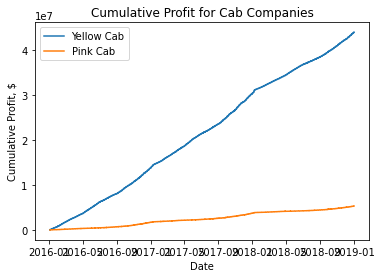

Yellow total profit: $44020373.17
Pink total profit: $5307328.32


In [71]:
# Cumulative profit.
yellow['cumu_profit'] = yellow['profit'].cumsum()
pink['cumu_profit'] = pink['profit'].cumsum()
import matplotlib.pyplot as plt
plt.plot(yellow['Date of Travel'], yellow['cumu_profit'])
plt.plot(pink['Date of Travel'], pink['cumu_profit'])
plt.xlabel('Date')
plt.ylabel('Cumulative Profit, $')
plt.legend(labels = ['Yellow Cab', 'Pink Cab'])
plt.title('Cumulative Profit for Cab Companies')
plt.show()
yellow_total_profit = yellow['cumu_profit'].iloc[-1]
pink_total_profit = pink['cumu_profit'].iloc[-1]
print('Yellow total profit: ${:.2f}'.format(yellow_total_profit))
print('Pink total profit: ${:.2f}'.format(pink_total_profit))

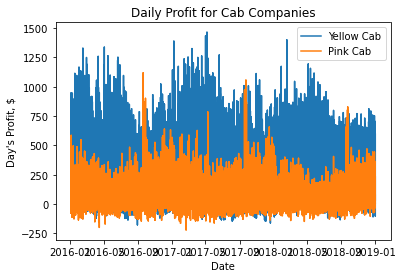

In [15]:
# Daily profit.
plt.plot(yellow['Date of Travel'], yellow['profit'])
plt.plot(pink['Date of Travel'], pink['profit'])
plt.xlabel('Date')
plt.ylabel("Day's Profit, $")
plt.legend(labels = ['Yellow Cab', 'Pink Cab'])
plt.title('Daily Profit for Cab Companies')
plt.show()

In [16]:
# Where do the companies operate?
print('YELLOW COMPANY CITIES: \n',yellow['City'].value_counts(), '\n')
print('PINK COMPANY CITIES: \n',pink['City'].value_counts())

YELLOW COMPANY CITIES: 
 NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637
SEATTLE WA         5265
SILICON VALLEY     4722
MIAMI FL           4452
AUSTIN TX          3028
ORANGE COUNTY      2469
DENVER CO          2431
PHOENIX AZ         1200
NASHVILLE TN       1169
TUCSON AZ          1132
SACRAMENTO CA      1033
PITTSBURGH PA       631
Name: City, dtype: int64 

PINK COMPANY CITIES: 
 LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI FL           2002
AUSTIN TX          1868
NASHVILLE TN       1841
ATLANTA GA         1762
ORANGE COUNTY      1513
DENVER CO          1394
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          864
TUCSON AZ           799
PITTSBURGH PA       682
Name: City, d

In [17]:
# Average trip duration.
print('The yellow company averages {:.2f} kilometers per trip.'.format(yellow['KM Travelled'].mean()))
print('The pink company averages {:.2f} kilometers per trip.'.format(pink['KM Travelled'].mean()))

The yellow company averages 22.57 kilometers per trip.
The pink company averages 22.56 kilometers per trip.


In [18]:
# Average profit per kilometer.
yellowppk = yellow['profit'].sum() / yellow['KM Travelled'].sum()
pinkppk = pink['profit'].sum() / pink['KM Travelled'].sum()
print('The yellow company averages ${:.2f} per km.'.format(yellowppk))
print('The pink company averages ${:.2f} per km.'.format(pinkppk))

The yellow company averages $7.10 per km.
The pink company averages $2.78 per km.


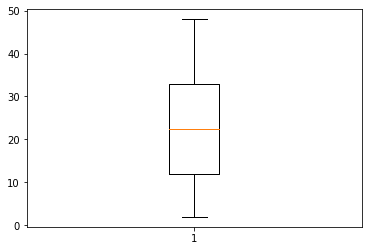

In [19]:
# Check for outliers.
plt.boxplot(cab['KM Travelled'])
plt.show()

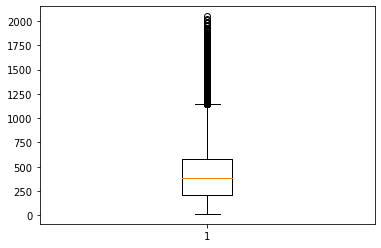

In [20]:
plt.boxplot(cab['Price Charged'])
plt.show()

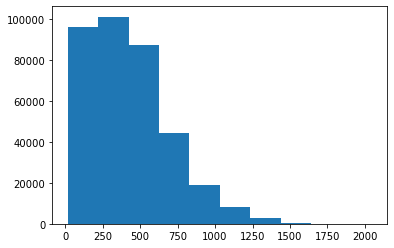

In [21]:
plt.hist(cab['Price Charged'])
plt.show()

In [22]:
# Distribution is right-skewed. Find highest price and who charged it.
maxprice = cab['Price Charged'].max()
print(cab.loc[cab['Price Charged'] ==maxprice])

        Transaction ID Date of Travel     Company         City  KM Travelled  \
138644        10170615     2017-05-07  Yellow Cab  NEW YORK NY          46.8   

        Price Charged  Cost of Trip  
138644        2048.03       584.064  


In [23]:
# Find top 20 prices and who charged them. Most are in NYC. All by Yellow Cab.
cabpricesort = cab.sort_values('Price Charged', ascending = False)
print(cabpricesort.head(20))

        Transaction ID Date of Travel     Company            City  \
138644        10170615     2017-05-07  Yellow Cab     NEW YORK NY   
138669        10170640     2017-05-07  Yellow Cab     NEW YORK NY   
138766        10170737     2017-05-02  Yellow Cab     NEW YORK NY   
247599        10302893     2018-02-18  Yellow Cab   PITTSBURGH PA   
138548        10170519     2017-05-02  Yellow Cab     NEW YORK NY   
8159          10010287     2016-02-16  Yellow Cab     NEW YORK NY   
138773        10170744     2017-05-07  Yellow Cab     NEW YORK NY   
138884        10170855     2017-05-02  Yellow Cab     NEW YORK NY   
122817        10150817     2017-02-28  Yellow Cab     NEW YORK NY   
138733        10170704     2017-05-02  Yellow Cab     NEW YORK NY   
138732        10170703     2017-05-02  Yellow Cab     NEW YORK NY   
111180        10136160     2017-01-08  Yellow Cab  SILICON VALLEY   
138709        10170680     2017-05-07  Yellow Cab     NEW YORK NY   
24687         10031184     2016-05

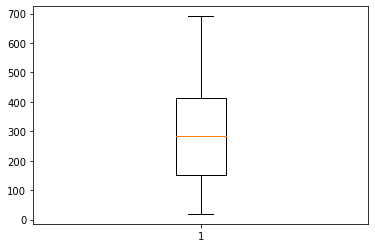

In [24]:
plt.boxplot(cab['Cost of Trip'])
plt.show()

In [25]:
# Who had more money-losing transactions?
yellowneg = yellow.loc[yellow['profit'] < 0]
pinkneg = pink.loc[pink['profit'] < 0]
print(yellowneg.shape)
print(pinkneg.shape)
print('The yellow company had {} more money-losing transactions than the pink company.'.format(yellowneg.shape[0] - pinkneg.shape[0]))
yellowtotal = yellow.shape[0]
pinktotal = pink.shape[0]
print('{:.2f}% of the yellow company transactions lost money.'.format(yellowneg.shape[0]/yellowtotal*100))
print('{:.2f}% of the pink company transactions lost money.'.format(pinkneg.shape[0]/pinktotal*100))

(13690, 9)
(11129, 9)
The yellow company had 2561 more money-losing transactions than the pink company.
4.98% of the yellow company transactions lost money.
13.14% of the pink company transactions lost money.


In [26]:
# Join transaction with customer ID.
trans_plus_cust = pd.merge(cab, transaction, how = 'left')
print(trans_plus_cust.head())

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-09  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-05  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode  
0         370.95       313.635        29290         Card  
1         358.52       334.854        27703         Card  
2         125.20        97.632        28712         Cash  
3         377.40       351.602        28020         Cash  
4         114.62        97.776        27182         Card  


In [27]:
# Join trans_plus_cust with customer demographics (customer).
transactions = pd.merge(trans_plus_cust, customer, how = 'left')
print(transactions.head())

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-09  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-05  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95       313.635        29290         Card   Male   28   
1         358.52       334.854        27703         Card   Male   27   
2         125.20        97.632        28712         Cash   Male   53   
3         377.40       351.602        28020         Cash   Male   23   
4         114.62        97.776        27182         Card   Male   33   

   Income (USD/Month)  
0               10813  
1                9237  
2               11242  
3               23327  
4             

In [28]:
# Customer gender demographics per company.
company_gender = transactions[['Customer ID', 'Company', 'Gender']]
print(company_gender.shape)
company_gender = company_gender.drop_duplicates()
print(company_gender.shape)

(359392, 3)
(72226, 3)


In [29]:
# Gender distribution of customers (yellow).
cgyellow = company_gender[company_gender.Company == 'Yellow Cab']
cgpink = company_gender[company_gender.Company == 'Pink Cab']
print(cgyellow['Gender'].value_counts())
print(cgyellow['Gender'].value_counts(normalize = True))

Male      21502
Female    18394
Name: Gender, dtype: int64
Male      0.538951
Female    0.461049
Name: Gender, dtype: float64


In [30]:
# Gender distribution of customers (pink).
print(cgpink['Gender'].value_counts())
print(cgpink['Gender'].value_counts(normalize = True))

Male      17511
Female    14819
Name: Gender, dtype: int64
Male      0.541633
Female    0.458367
Name: Gender, dtype: float64


In [31]:
# Customer age demographics per company.
company_age = transactions[['Customer ID', 'Company', 'Age']]
print(company_age.shape)
company_age = company_age.drop_duplicates()
print(company_age.shape)

(359392, 3)
(72226, 3)


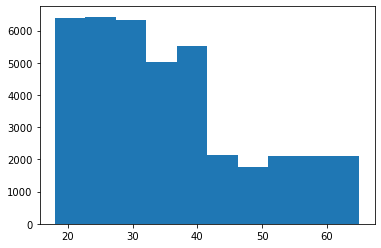

count    39896.000000
mean        35.338956
std         12.576728
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: Age, dtype: float64


In [32]:
# Age distribution of customers (yellow).
cayellow = company_age[company_age.Company == 'Yellow Cab']
capink = company_age[company_age.Company == 'Pink Cab']
plt.hist(cayellow['Age'])
plt.show()
print(cayellow.Age.describe())

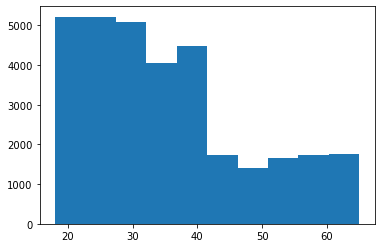

count    32330.000000
mean        35.368791
std         12.636121
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: Age, dtype: float64


In [33]:
# Age distribution of customers (pink).
plt.hist(capink['Age'])
plt.show()
print(capink.Age.describe())

In [34]:
# Customer income demographics per company.
company_inc = transactions[['Customer ID', 'Company', 'Income (USD/Month)']]
print(company_inc.shape)
company_inc = company_inc.drop_duplicates()
print(company_inc.shape)

(359392, 3)
(72226, 3)


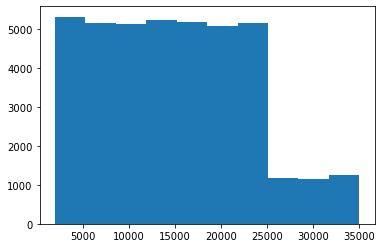

count    39896.000000
mean     14983.896832
std       7994.148593
min       2000.000000
25%       8280.750000
50%      14619.500000
75%      21003.000000
max      34996.000000
Name: Income (USD/Month), dtype: float64


In [35]:
# Income distribution of customers (yellow).
ciyellow = company_inc[company_inc.Company == 'Yellow Cab']
cipink = company_inc[company_inc.Company == 'Pink Cab']
plt.hist(ciyellow['Income (USD/Month)'])
plt.show()
print(ciyellow['Income (USD/Month)'].describe())

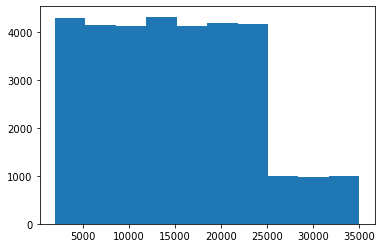

count    32330.000000
mean     15034.097618
std       7999.420516
min       2000.000000
25%       8316.250000
50%      14651.500000
75%      21057.750000
max      35000.000000
Name: Income (USD/Month), dtype: float64


In [36]:
# Income distribution of customers (pink).
plt.hist(cipink['Income (USD/Month)'])
plt.show()
print(cipink['Income (USD/Month)'].describe())

In [37]:
# Market penetration.
company_cities = transactions[['Company', 'City', 'Customer ID']]
print(company_cities.shape)
company_cities = company_cities.drop_duplicates()
print(company_cities.shape)
yellow_city_cust = company_cities[company_cities['Company'] == 'Yellow Cab']
pink_city_cust = company_cities[company_cities['Company'] == 'Pink Cab']
yellow_city_cust_vals = yellow_city_cust['City'].value_counts()
pink_city_cust_vals = pink_city_cust['City'].value_counts()
print(yellow_city_cust_vals)
print(pink_city_cust_vals)

(359392, 3)
(72226, 3)
NEW YORK NY       3000
CHICAGO IL        3000
WASHINGTON DC     3000
LOS ANGELES CA    2998
BOSTON MA         2997
SAN DIEGO CA      2886
ATLANTA GA        2595
DALLAS TX         2564
SEATTLE WA        2486
SILICON VALLEY    2382
MIAMI FL          2334
AUSTIN TX         1914
ORANGE COUNTY     1712
DENVER CO         1681
PHOENIX AZ         994
NASHVILLE TN       965
TUCSON AZ          934
SACRAMENTO CA      880
PITTSBURGH PA      574
Name: City, dtype: int64
LOS ANGELES CA    2996
NEW YORK NY       2972
SAN DIEGO CA      2909
CHICAGO IL        2859
BOSTON MA         2463
SILICON VALLEY    2130
WASHINGTON DC     2109
SEATTLE WA        1790
MIAMI FL          1480
NASHVILLE TN      1356
AUSTIN TX         1354
ATLANTA GA        1322
ORANGE COUNTY     1198
DENVER CO         1145
DALLAS TX         1118
SACRAMENTO CA     1078
PHOENIX AZ         763
TUCSON AZ          684
PITTSBURGH PA      604
Name: City, dtype: int64


In [38]:
# Make table of user counts per company.
city = city.merge(yellow_city_cust['City'].value_counts().to_frame(), how='left', left_on='City',
         right_index=True).rename(columns = {'City_x': 'City', 'City_y': 'yellowcustcount'})
print(city)

                City   Population      Users  yellowcustcount
0        NEW YORK NY   8,405,837    302,149            3000.0
1         CHICAGO IL   1,955,130    164,468            3000.0
2     LOS ANGELES CA   1,595,037    144,132            2998.0
3           MIAMI FL   1,339,155     17,675            2334.0
4     SILICON VALLEY   1,177,609     27,247            2382.0
5      ORANGE COUNTY   1,030,185     12,994            1712.0
6       SAN DIEGO CA     959,307     69,995            2886.0
7         PHOENIX AZ     943,999      6,133             994.0
8          DALLAS TX     942,908     22,157            2564.0
9         ATLANTA GA     814,885     24,701            2595.0
10         DENVER CO     754,233     12,421            1681.0
11         AUSTIN TX     698,371     14,978            1914.0
12        SEATTLE WA     671,238     25,063            2486.0
13         TUCSON AZ     631,442      5,712             934.0
14  SAN FRANCISCO CA     629,591    213,609               NaN
15     S

In [39]:
city = city.merge(pink_city_cust['City'].value_counts().to_frame(), how='left', left_on='City',
         right_index=True).rename(columns = {'City_x': 'City', 'City_y': 'pinkcustcount'})
print(city)

                City   Population      Users  yellowcustcount  pinkcustcount
0        NEW YORK NY   8,405,837    302,149            3000.0         2972.0
1         CHICAGO IL   1,955,130    164,468            3000.0         2859.0
2     LOS ANGELES CA   1,595,037    144,132            2998.0         2996.0
3           MIAMI FL   1,339,155     17,675            2334.0         1480.0
4     SILICON VALLEY   1,177,609     27,247            2382.0         2130.0
5      ORANGE COUNTY   1,030,185     12,994            1712.0         1198.0
6       SAN DIEGO CA     959,307     69,995            2886.0         2909.0
7         PHOENIX AZ     943,999      6,133             994.0          763.0
8          DALLAS TX     942,908     22,157            2564.0         1118.0
9         ATLANTA GA     814,885     24,701            2595.0         1322.0
10         DENVER CO     754,233     12,421            1681.0         1145.0
11         AUSTIN TX     698,371     14,978            1914.0         1354.0

In [40]:
city = city.fillna(0)
print(city)

                City   Population      Users  yellowcustcount  pinkcustcount
0        NEW YORK NY   8,405,837    302,149            3000.0         2972.0
1         CHICAGO IL   1,955,130    164,468            3000.0         2859.0
2     LOS ANGELES CA   1,595,037    144,132            2998.0         2996.0
3           MIAMI FL   1,339,155     17,675            2334.0         1480.0
4     SILICON VALLEY   1,177,609     27,247            2382.0         2130.0
5      ORANGE COUNTY   1,030,185     12,994            1712.0         1198.0
6       SAN DIEGO CA     959,307     69,995            2886.0         2909.0
7         PHOENIX AZ     943,999      6,133             994.0          763.0
8          DALLAS TX     942,908     22,157            2564.0         1118.0
9         ATLANTA GA     814,885     24,701            2595.0         1322.0
10         DENVER CO     754,233     12,421            1681.0         1145.0
11         AUSTIN TX     698,371     14,978            1914.0         1354.0

In [41]:
# Percent of users for each company.
city['Users'] = city['Users'].str.strip()
city['Users'] = city['Users'].str.replace(',', '')
city['Users'] = city['Users'].astype(float)
city['yellowpct'] = city['yellowcustcount']/city['Users'] * 100
city['pinkpct'] = city['pinkcustcount']/city['Users'] * 100
print(city)
city = city.sort_values('yellowpct', ascending = False)
print(city)

                City   Population     Users  yellowcustcount  pinkcustcount  \
0        NEW YORK NY   8,405,837   302149.0           3000.0         2972.0   
1         CHICAGO IL   1,955,130   164468.0           3000.0         2859.0   
2     LOS ANGELES CA   1,595,037   144132.0           2998.0         2996.0   
3           MIAMI FL   1,339,155    17675.0           2334.0         1480.0   
4     SILICON VALLEY   1,177,609    27247.0           2382.0         2130.0   
5      ORANGE COUNTY   1,030,185    12994.0           1712.0         1198.0   
6       SAN DIEGO CA     959,307    69995.0           2886.0         2909.0   
7         PHOENIX AZ     943,999     6133.0            994.0          763.0   
8          DALLAS TX     942,908    22157.0           2564.0         1118.0   
9         ATLANTA GA     814,885    24701.0           2595.0         1322.0   
10         DENVER CO     754,233    12421.0           1681.0         1145.0   
11         AUSTIN TX     698,371    14978.0         

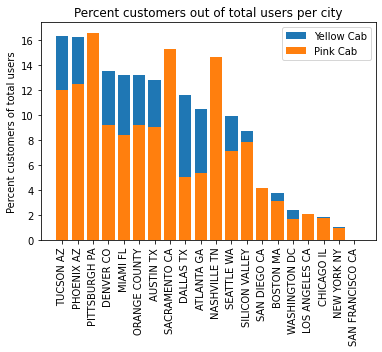

In [42]:
# Chart pct market penetration.
fig, ax = plt.subplots()
ax.bar(city['City'], city['yellowpct'], label = 'Yellow Cab')
ax.bar(city['City'], city['pinkpct'], label = 'Pink Cab')
ax.set_ylabel('Percent customers of total users')
ax.set_title('Percent customers out of total users per city')
ax.legend()
plt.xticks(rotation = 90)
plt.show()

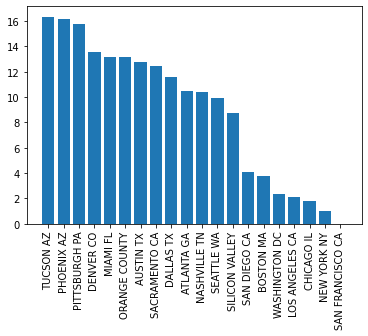

In [43]:
plt.bar(city['City'], city['yellowpct'])
plt.xticks(rotation = 90)
plt.show()

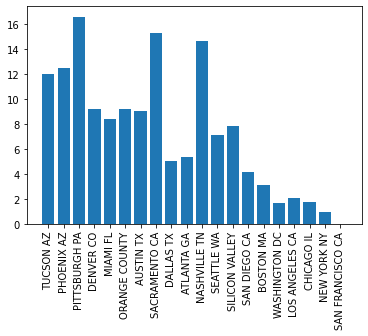

In [44]:
plt.bar(city['City'], city['pinkpct'])
plt.xticks(rotation = 90)
plt.show()

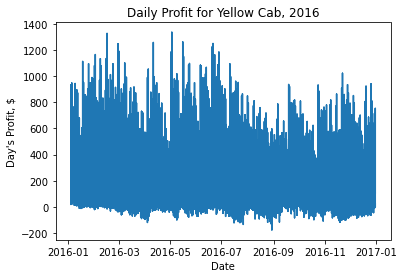

In [45]:
# Check seasonality of profit.
yellow16 = yellow.loc[(yellow['Date of Travel'] >= '2016-01-01') & (yellow['Date of Travel'] < '2017-01-01')].sort_values(['Date of Travel'])
plt.plot(yellow16['Date of Travel'], yellow16['profit'])
plt.xlabel('Date')
plt.ylabel("Day's Profit, $")
plt.title('Daily Profit for Yellow Cab, 2016')
plt.show()

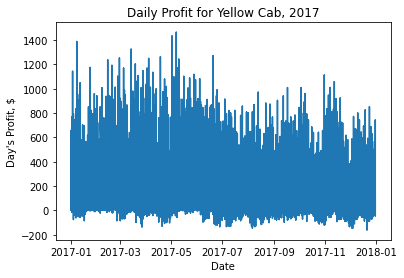

In [46]:
yellow17 = yellow.loc[(yellow['Date of Travel'] >= '2017-01-01') & (yellow['Date of Travel'] < '2018-01-01')].sort_values(['Date of Travel'])
plt.plot(yellow17['Date of Travel'], yellow17['profit'])
plt.xlabel('Date')
plt.ylabel("Day's Profit, $")
plt.title('Daily Profit for Yellow Cab, 2017')
plt.show()

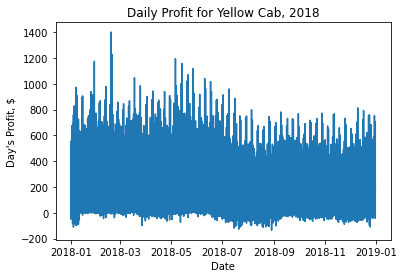

In [47]:
yellow18 = yellow.loc[(yellow['Date of Travel'] >= '2018-01-01') & (yellow['Date of Travel'] < '2019-01-01')].sort_values(['Date of Travel'])
plt.plot(yellow18['Date of Travel'], yellow18['profit'])
plt.xlabel('Date')
plt.ylabel("Day's Profit, $")
plt.title('Daily Profit for Yellow Cab, 2018')
plt.show()

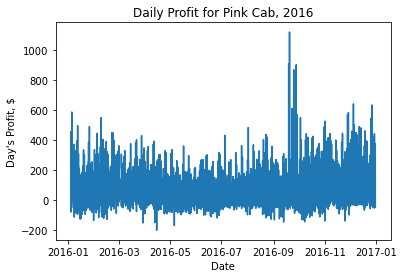

In [48]:
pink16 = pink.loc[(pink['Date of Travel'] >= '2016-01-01') & (pink['Date of Travel'] < '2017-01-01')].sort_values(['Date of Travel'])
plt.plot(pink16['Date of Travel'], pink16['profit'])
plt.xlabel('Date')
plt.ylabel("Day's Profit, $")
plt.title('Daily Profit for Pink Cab, 2016')
plt.show()

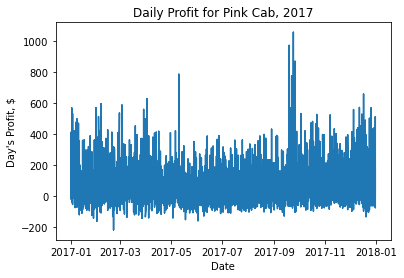

In [49]:
pink17 = pink.loc[(pink['Date of Travel'] >= '2017-01-01') & (pink['Date of Travel'] < '2018-01-01')].sort_values(['Date of Travel'])
plt.plot(pink17['Date of Travel'], pink17['profit'])
plt.xlabel('Date')
plt.ylabel("Day's Profit, $")
plt.title('Daily Profit for Pink Cab, 2017')
plt.show()

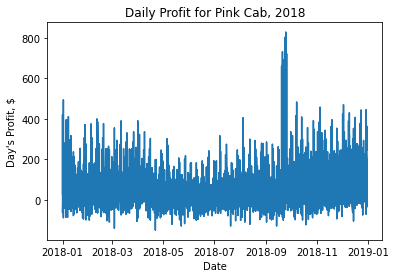

In [50]:
pink18 = pink.loc[(pink['Date of Travel'] >= '2018-01-01') & (pink['Date of Travel'] < '2019-01-01')].sort_values(['Date of Travel'])
plt.plot(pink18['Date of Travel'], pink18['profit'])
plt.xlabel('Date')
plt.ylabel("Day's Profit, $")
plt.title('Daily Profit for Pink Cab, 2018')
plt.show()

In [51]:
# Count transactions per day.
yellowtx = cab[cab['Company'] == 'Yellow Cab']
pinktx = cab[cab['Company'] == 'Pink Cab']
yellowtx['tx_count'] = yellowtx.groupby('Date of Travel')['Transaction ID'].transform('count')
pinktx['tx_count'] = pinktx.groupby('Date of Travel')['Transaction ID'].transform('count')
print(yellowtx.head())
print(pinktx.head())

     Transaction ID Date of Travel     Company        City  KM Travelled  \
233        10000384     2016-01-04  Yellow Cab  ATLANTA GA         33.93   
234        10000385     2016-01-11  Yellow Cab  ATLANTA GA         42.18   
235        10000386     2016-01-05  Yellow Cab  ATLANTA GA         10.60   
236        10000387     2016-01-08  Yellow Cab  ATLANTA GA         26.75   
237        10000388     2016-01-09  Yellow Cab  ATLANTA GA         46.02   

     Price Charged  Cost of Trip  tx_count  
233        1341.17      464.1624       140  
234        1412.06      516.2832       232  
235         364.62      132.2880       126  
236         838.00      333.8400        86  
237        1540.61      596.4192       117  
   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA   

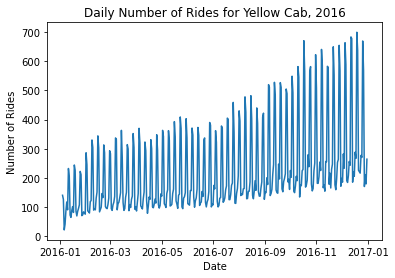

In [52]:
yellow16 = yellowtx.loc[(yellowtx['Date of Travel'] >= '2016-01-01') & (yellowtx['Date of Travel'] < '2017-01-01')].sort_values(['Date of Travel'])
yellow16 = yellow16[['Date of Travel', 'tx_count']]
yellow16 = yellow16.drop_duplicates()
plt.plot(yellow16['Date of Travel'], yellow16['tx_count'])
plt.xlabel('Date')
plt.ylabel("Number of Rides")
plt.title('Daily Number of Rides for Yellow Cab, 2016')
plt.show()

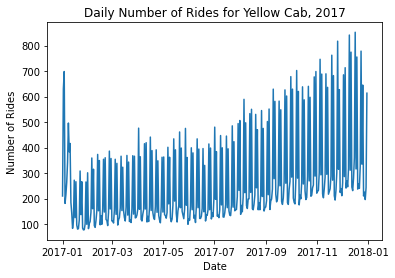

In [53]:
yellow17 = yellowtx.loc[(yellowtx['Date of Travel'] >= '2017-01-01') & (yellowtx['Date of Travel'] < '2018-01-01')].sort_values(['Date of Travel'])
yellow17 = yellow17[['Date of Travel', 'tx_count']]
yellow17 = yellow17.drop_duplicates()
plt.plot(yellow17['Date of Travel'], yellow17['tx_count'])
plt.xlabel('Date')
plt.ylabel("Number of Rides")
plt.title('Daily Number of Rides for Yellow Cab, 2017')
plt.show()

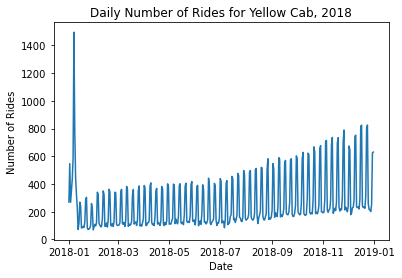

In [54]:
yellow18 = yellowtx.loc[(yellowtx['Date of Travel'] >= '2018-01-01') & (yellowtx['Date of Travel'] < '2019-01-01')].sort_values(['Date of Travel'])
yellow18 = yellow18[['Date of Travel', 'tx_count']]
yellow18 = yellow18.drop_duplicates()
plt.plot(yellow18['Date of Travel'], yellow18['tx_count'])
plt.xlabel('Date')
plt.ylabel("Number of Rides")
plt.title('Daily Number of Rides for Yellow Cab, 2018')
plt.show()

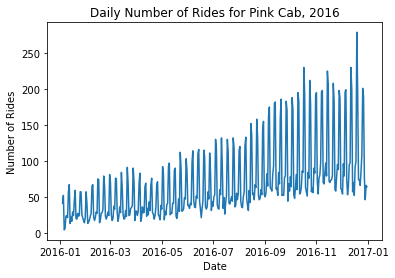

In [55]:
pink16 = pinktx.loc[(pinktx['Date of Travel'] >= '2016-01-01') & (pinktx['Date of Travel'] < '2017-01-01')].sort_values(['Date of Travel'])
pink16 = pink16[['Date of Travel', 'tx_count']]
pink16 = pink16.drop_duplicates()
plt.plot(pink16['Date of Travel'], pink16['tx_count'])
plt.xlabel('Date')
plt.ylabel("Number of Rides")
plt.title('Daily Number of Rides for Pink Cab, 2016')
plt.show()

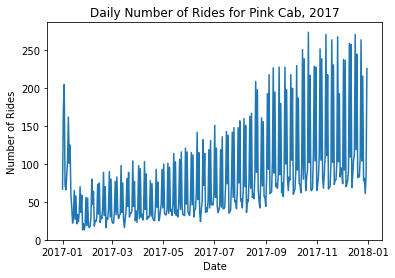

In [56]:
pink17 = pinktx.loc[(pinktx['Date of Travel'] >= '2017-01-01') & (pinktx['Date of Travel'] < '2018-01-01')].sort_values(['Date of Travel'])
pink17 = pink17[['Date of Travel', 'tx_count']]
pink17 = pink17.drop_duplicates()
plt.plot(pink17['Date of Travel'], pink17['tx_count'])
plt.xlabel('Date')
plt.ylabel("Number of Rides")
plt.title('Daily Number of Rides for Pink Cab, 2017')
plt.show()

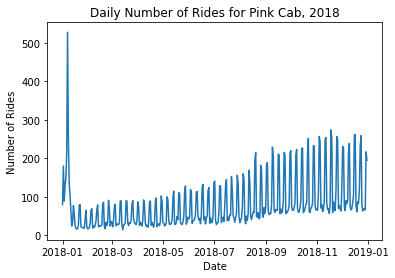

In [57]:
pink18 = pinktx.loc[(pinktx['Date of Travel'] >= '2018-01-01') & (pinktx['Date of Travel'] < '2019-01-01')].sort_values(['Date of Travel'])
pink18 = pink18[['Date of Travel', 'tx_count']]
pink18 = pink18.drop_duplicates()
plt.plot(pink18['Date of Travel'], pink18['tx_count'])
plt.xlabel('Date')
plt.ylabel("Number of Rides")
plt.title('Daily Number of Rides for Pink Cab, 2018')
plt.show()

In [58]:
# Count daily customers.
yellowtx = trans_plus_cust[trans_plus_cust['Company'] == 'Yellow Cab']
pinktx = trans_plus_cust[trans_plus_cust['Company'] == 'Pink Cab']
yellowtx['cust_count'] = yellowtx.groupby('Date of Travel')['Customer ID'].transform('count')
pinktx['cust_count'] = pinktx.groupby('Date of Travel')['Customer ID'].transform('count')
print(yellowtx.head())
print(pinktx.head())

     Transaction ID Date of Travel     Company        City  KM Travelled  \
233        10000384     2016-01-04  Yellow Cab  ATLANTA GA         33.93   
234        10000385     2016-01-11  Yellow Cab  ATLANTA GA         42.18   
235        10000386     2016-01-05  Yellow Cab  ATLANTA GA         10.60   
236        10000387     2016-01-08  Yellow Cab  ATLANTA GA         26.75   
237        10000388     2016-01-09  Yellow Cab  ATLANTA GA         46.02   

     Price Charged  Cost of Trip  Customer ID Payment_Mode  cust_count  
233        1341.17      464.1624        27602         Card         140  
234        1412.06      516.2832        27594         Cash         232  
235         364.62      132.2880        27884         Cash         126  
236         838.00      333.8400        28533         Cash          86  
237        1540.61      596.4192        29039         Card         117  
   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10 

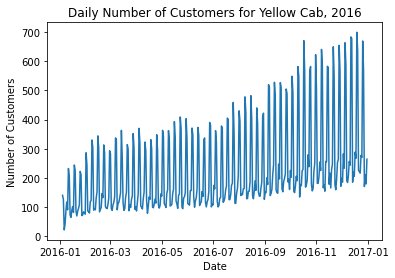

In [59]:
yellow16 = yellowtx.loc[(yellowtx['Date of Travel'] >= '2016-01-01') & (yellowtx['Date of Travel'] < '2017-01-01')].sort_values(['Date of Travel'])
yellow16 = yellow16[['Date of Travel', 'cust_count']]
yellow16 = yellow16.drop_duplicates()
plt.plot(yellow16['Date of Travel'], yellow16['cust_count'])
plt.xlabel('Date')
plt.ylabel("Number of Customers")
plt.title('Daily Number of Customers for Yellow Cab, 2016')
plt.show()

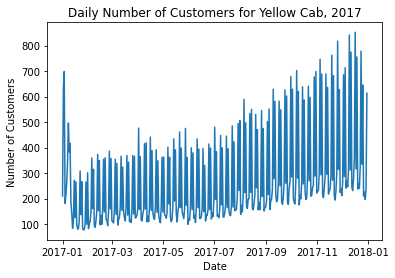

In [60]:
yellow17 = yellowtx.loc[(yellowtx['Date of Travel'] >= '2017-01-01') & (yellowtx['Date of Travel'] < '2018-01-01')].sort_values(['Date of Travel'])
yellow17 = yellow17[['Date of Travel', 'cust_count']]
yellow17 = yellow17.drop_duplicates()
plt.plot(yellow17['Date of Travel'], yellow17['cust_count'])
plt.xlabel('Date')
plt.ylabel("Number of Customers")
plt.title('Daily Number of Customers for Yellow Cab, 2017')
plt.show()

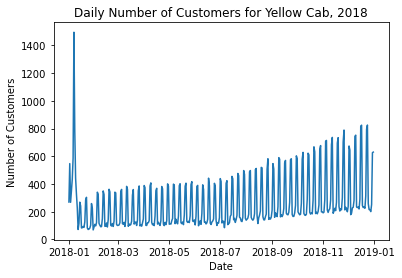

In [61]:
yellow18 = yellowtx.loc[(yellowtx['Date of Travel'] >= '2018-01-01') & (yellowtx['Date of Travel'] < '2019-01-01')].sort_values(['Date of Travel'])
yellow18 = yellow18[['Date of Travel', 'cust_count']]
yellow18 = yellow18.drop_duplicates()
plt.plot(yellow18['Date of Travel'], yellow18['cust_count'])
plt.xlabel('Date')
plt.ylabel("Number of Customers")
plt.title('Daily Number of Customers for Yellow Cab, 2018')
plt.show()

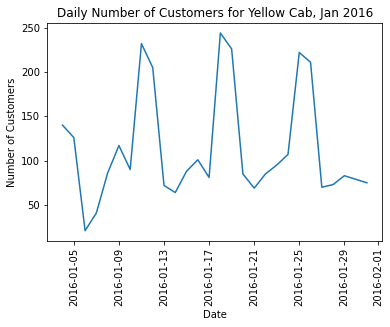

In [62]:
# Sample month for seasonality.
yellow16 = yellowtx.loc[(yellowtx['Date of Travel'] >= '2016-01-01') & (yellowtx['Date of Travel'] < '2016-02-01')].sort_values(['Date of Travel'])
yellow16 = yellow16[['Date of Travel', 'cust_count']]
yellow16 = yellow16.drop_duplicates()
plt.plot(yellow16['Date of Travel'], yellow16['cust_count'])
plt.xlabel('Date')
plt.ylabel("Number of Customers")
plt.title('Daily Number of Customers for Yellow Cab, Jan 2016')
plt.xticks(rotation = 90)
plt.show()

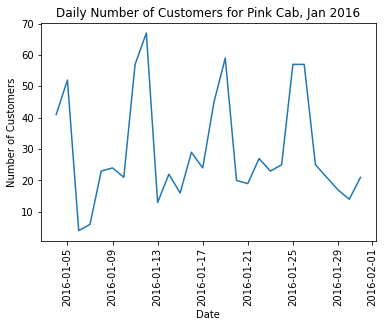

In [63]:
pink16 = pinktx.loc[(pinktx['Date of Travel'] >= '2016-01-01') & (pinktx['Date of Travel'] < '2016-02-01')].sort_values(['Date of Travel'])
pink16 = pink16[['Date of Travel', 'cust_count']]
pink16 = pink16.drop_duplicates()
plt.plot(pink16['Date of Travel'], pink16['cust_count'])
plt.xlabel('Date')
plt.ylabel("Number of Customers")
plt.title('Daily Number of Customers for Pink Cab, Jan 2016')
plt.xticks(rotation = 90)
plt.show()

In [68]:
# Find % of repeat customers.
custs = transactions[['Company', 'Customer ID']]
custs_y = custs[custs['Company'] == 'Yellow Cab']
custs_p = custs[custs['Company'] == 'Pink Cab']
percentage_y = custs_y.duplicated(keep=False).value_counts(normalize=True) * 100
percentage_p = custs_p.duplicated(keep = False).value_counts(normalize = True) * 100
print('Yellow Cab has {:.0f}% repeat customers.'.format(percentage_y[1]))
print('Pink Cab has {:.0f}% repeat customers.'.format(percentage_p[1]))

Yellow Cab has 96% repeat customers.
Pink Cab has 83% repeat customers.


Date of Travel  Date of Travel
2016            1                  3188
                2                  4828
                3                  5322
                4                  5061
                5                  6247
                6                  5606
                7                  6270
                8                  7443
                9                  8003
                10                 9434
                11                 9627
                12                10370
2017            1                  7110
                2                  5317
                3                  5809
                4                  6497
                5                  6806
                6                  6171
                7                  7471
                8                  8724
                9                  9319
                10                11365
                11                11121
                12                12502
2018     

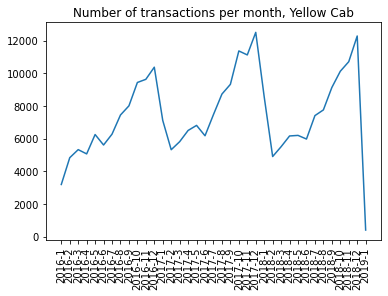

In [110]:
# Count transactions by month/year.
y = cab['Date of Travel'].dt.year
m = cab['Date of Travel'].dt.month
cab_y = cab[cab['Company'] == 'Yellow Cab']
cab_p = cab[cab['Company'] == 'Pink Cab']
cab_y_count = cab_y.groupby([y,m])['Transaction ID'].count()
cab_p_count = cab_p.groupby([y,m])['Transaction ID'].count()
print(cab_y_count)
cab_y_df = pd.DataFrame(cab_y_count)
cab_p_df = pd.DataFrame(cab_p_count)
print(cab_y_df.head())
cab_y_df.index.names = ['Year', 'Month']
cab_p_df.index.names = ['Year', 'Month']
cab_y_df = cab_y_df.reset_index()
cab_p_df = cab_p_df.reset_index()
cab_y_df['Date'] = cab_y_df['Year'].astype(str) + '-' + cab_y_df['Month'].astype(str)
cab_p_df['Date'] = cab_p_df['Year'].astype(str) + '-' + cab_p_df['Month'].astype(str)
plt.plot(cab_y_df['Date'], cab_y_df['Transaction ID'])
plt.xticks(rotation = 90)
plt.title('Number of transactions per month, Yellow Cab')
plt.show()

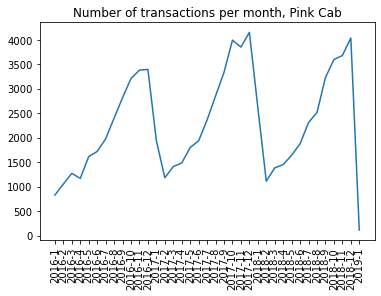

In [111]:
plt.plot(cab_p_df['Date'], cab_p_df['Transaction ID'])
plt.xticks(rotation = 90)
plt.title('Number of transactions per month, Pink Cab')
plt.show()